<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/basic/8_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST: 손으로 쓴 숫자들로 이루어진 대형 데이터 베이스 

화상처리(숫자인식) 시스템의 테스트

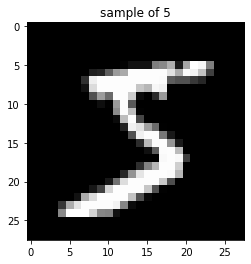

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import time

#  MNIST dataset import
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# x_train, x_test = x_train/255.0, x_test/255.0

def show(a,b,n):
  image = a[n]
  image_reshaped = image.reshape(28, 28)
  image_reshaped.shape
  plt.figure(figsize = (4, 4))
  try:
    label =b[n]
    plt.title("sample of " + str(label))
  except:
    plt.title("sample of " + str(n))
  plt.imshow(image_reshaped, cmap="gray")
  plt.show()

show(x_train,y_train,0)

        

In [42]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sorftmax(x):
  c=np.max(x)
  return np.exp(x-c)/np.sum(np.exp(x-c))

학습할 자료
-x_train, y_train

검증할 데이터
-x_test ,y_test

In [43]:
#x-(데이터의 갯수 , 이미지 행렬)
#y-(데이터의 라벨)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [44]:
def img_show(img):
  image_reshaped = img.reshape(28, 28)
  image_reshaped.shape
  plt.figure(figsize = (4, 4))
  plt.imshow(image_reshaped, cmap="gray")
  plt.show()



5


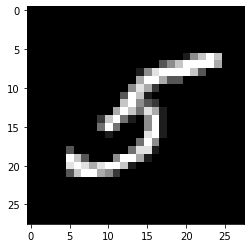

In [45]:
img=x_train[35]
label=y_train[35]
print(label)
img_show(img)

입력은 784 (28*28) 이고 결과값은 0~9까지 이고

그사이 히든 레이어가 존재 하는데 그 히든 레이어의 데이터값이 sample_weight.pkl에 담겨있다

이미 만들어진 것이 얼마나 작동이 잘되는지를 확인 할 것이다.

In [69]:
def get_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  return x_test,y_test

def init_network():
  with open('/content/drive/MyDrive/Colab Notebooks/sample_weight.pkl','rb') as f:
    network=pickle.load(f)
  return network

def predict(network,x):
  W1,W2,W3= network['W1'],network['W2'],network['W3']
  b1,b2,b3= network['b1'],network['b2'],network['b3']
  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(a2,W3)+b3
  y=sorftmax(a3)
  return y


In [79]:
start = time.time()
x,t=get_data()
x=x.reshape(x.shape[0],784)
network=init_network()
accuracy_cnt=0

for i in range(len(x)):
  y=predict(network,x[i])
  p=np.argmax(y)
  if p==t[i]:
    accuracy_cnt+=1

print("Accurancy:"+ str(float(accuracy_cnt/len(x))))

time_1=time.time() - start
print("time :", time_1)  # 현재시각 - 시작시간 = 실행 시간

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accurancy:0.8923
time : 1.2642865180969238


In [50]:
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)


(784, 50)
(50, 100)
(100, 10)


#해석
(784x1 or 1x784) * 784x50 =1x50 >

1x50 * 50x100= 1x100 >

1x100 * 100x10= 1x10

마지막 10은 0~9까지의 확률이 나오게된다 소프트 맥스를 활용하여 가장 큰 값을 출력

그중 가장 큰 값을 np.max로 가져오고 그값이 y_test의 라벨값과 맞는지 확인

그후 예측이 맞는지 확인 해보게 된다

#배치 처리


*   io(입력 input 출력 output) 에 상대적으로 많은 시간 소요
*   메모리가 허용하는 한 한번에 많은 데이터를 읽어옴
*   1장씩 사진을 처리하면 1장씩 10000번을 읽어와야하지만
*   100장씩 사진을 처리하면 100장씩 100번을 읽어오면됨
*   즉 1장씩 만번보다 100장씩 100번 반복에 걸리는 시간이 짧음
*   큰 배열을 계산하는 것이 작은 배열을 여러번 계산하는 것보다 빠름

In [81]:
start = time.time()
x,t=get_data()
x=x.reshape(x.shape[0],784)
network=init_network()
batch_size=100
accuracy_cnt=0

for i in range(0,len(x),100):
  x_batch=x[i:i+batch_size]
  y_batch=predict(network, x_batch)
  p=np.argmax(y_batch, axis=1)
  accuracy_cnt+=np.sum(p==t[i:i+batch_size])

print("Accurancy:"+ str(float(accuracy_cnt/len(x))))

time_2=time.time() - start
print("time :", time_2)  # 현재시각 - 시작시간 = 실행 시간

Accurancy:0.8923
time : 0.43556976318359375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [85]:
print('\n한개씩의 소모 시간:',time_1,'\n100개씩의 소모 시간:',time_2,'\n시간차:',time_1 - time_2)


한개씩의 소모 시간: 1.2642865180969238 
100개씩의 소모 시간: 0.43556976318359375 
시간차: 0.8287167549133301


확실히 코드 실행에서 시간이 차이가 난다

Mean Square Error (MSE)

MSE=1/N(sum((y-t)^2))

In [86]:
#  모델 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#  모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#  모델 훈련
model.fit(x_train, y_train, epochs=5)

#  정확도 
test_loss, test_acc = model.evaluate(x_test, y_test)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 2.4982 - accuracy: 0.9080
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3343 - accuracy: 0.9363
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2976 - accuracy: 0.9418
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2769 - accuracy: 0.9448
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.9473
정확도: 0.9473000168800354
